In [20]:
# Random Forest Classifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix ,f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from PIL import Image
import os
import time
import matplotlib.pyplot as plt

In [12]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

# Retrieving the images and their labels
for i in range(classes):
    path = os.path.join(cur_path, 'train', str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(os.path.join(path, a))
            image = image.resize((30, 30))
            data.append(np.array(image).flatten())  # Flatten the image for Random Forest
            labels.append(i)
        except:
            print(f"Error loading image {a}")

data = np.array(data)
labels = np.array(labels)

In [13]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


In [14]:
# Start timer
start_time = time.time()

In [15]:
# Training Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [16]:
# End timer
end_time = time.time()
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")

Training Time: 193.87 seconds


In [17]:
# Making predictions
y_pred = clf.predict(X_test)

In [21]:
# Calculate Metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

In [22]:
# Print metrics and training time
print(f"Training Time: {training_time:.2f} seconds")
print(f"Accuracy: {accuracy:.2f}")
print(f"F1-Score: {f1:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Training Time: 193.87 seconds
Accuracy: 0.98
F1-Score: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.84      0.91        38
           1       0.93      0.98      0.96       496
           2       0.94      0.96      0.95       450
           3       0.97      0.96      0.97       280
           4       0.99      0.98      0.99       418
           5       0.94      0.92      0.93       364
           6       0.98      1.00      0.99        59
           7       0.96      0.95      0.95       278
           8       0.97      0.97      0.97       301
           9       0.99      0.99      0.99       268
          10       1.00      1.00      1.00       370
          11       0.98      1.00      0.99       236
          12       1.00      0.99      1.00       450
          13       0.99      1.00      0.99       452
          14       1.00      1.00      1.00       162
          15       1.00      1.00      1.00       1

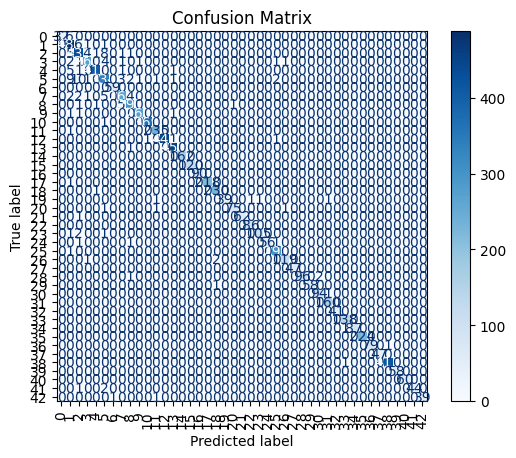

In [19]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(classes))
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()

In [23]:
# Create Metrics Table
metrics_data = {
    "Metric": ["Accuracy", "F1-Score", "Training Time (s)"],
    "Value": [accuracy, f1, training_time]
}
metrics_df = pd.DataFrame(metrics_data)

# Display Metrics Table
print("\nMetrics Summary:")
print(metrics_df)


Metrics Summary:
              Metric       Value
0           Accuracy    0.981127
1           F1-Score    0.981106
2  Training Time (s)  193.865122
